## mnsist classifier using pytorch

adapted from https://pytorch.org/tutorials/beginner/nn_tutorial.html

### Where to run this notebook

You can run this locally; i.e. not on paperspace. You will need to install pytorch. You can find instructions here: 
https://pytorch.org/

This notebook should be uploaded to a directory that contains a data subdirectory. If needed, create the data subdirectory manually.

### get the mnist data

In [1]:
import torchvision.models as models

#googlenet = models.googlenet(pretrained=True)
network = models.resnet18(pretrained=True)

In [2]:
import torch.nn.functional as F
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import torch as torch
import numpy as np
import os
    


from pathlib import Path
import pickle
import gzip
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image
import glob
import torchvision.transforms as transforms
import cv2

In [3]:
# read the data
datapath = "./tiny-imagenet-200/"
trainpath = datapath + "train/"
classIDs = os.listdir(trainpath)
classIDDict = {}
for i in range(len(classIDs)):
    classIDDict[classIDs[i]] = i

classCount = len(classIDs)
sourceDim = 64
targetDim = 224
channels = 3

trainPerClass = 450   #500 original
testPerClass = 10
validPerClass = 20

imageCountTr = classCount  * trainPerClass
imageCountTs = classCount  * testPerClass
imageCountV = classCount  * validPerClass

def stackImage(image):
    return np.stack((im,)*channels, axis=-1)

def processImage(image):
    if (len(image.shape) < channels):
        image = stackImage(image)
    asfloat = image.astype('float32')
    resized = cv2.resize(asfloat, dsize=(targetDim,targetDim), interpolation=cv2.INTER_CUBIC)
    rolled = np.rollaxis(resized, 2, 0)
    tensor = torch.tensor(rolled)
    normalized = normalize(tensor)
    numpied = normalized.numpy()[:,:,:]
    return numpied

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [4]:
#training, test, validation data
imagesTr = np.zeros((imageCountTr, channels, targetDim, targetDim), dtype="float32")
labelsTr = np.zeros(imageCountTr, dtype=int)

imagesTs = np.zeros((imageCountTs, channels, targetDim, targetDim), dtype="float32")
labelsTs = np.zeros(imageCountTs, dtype=int)

imagesV = np.zeros((imageCountV, channels, targetDim, targetDim), dtype="float32")
labelsV = np.zeros(imageCountV, dtype=int)

dataset = [(imagesTr, labelsTr), (imagesTs, labelsTs), (imagesV, labelsV)]

for i in range(len(classIDs)):
    fileNames = glob.glob(trainpath+classIDs[i]+"/images/*.JPEG")
    j = 0
    for s in dataset:
        length = int(len(s[0]) / classCount)
        for k in range(length):
            classIndex = j + k
            setIndex = i * length + k
            im = mpimg.imread(fileNames[classIndex].replace("\\", "/"))
            im = processImage(im)
            label = i
            s[0][setIndex] = im
            s[1][setIndex] = label 
        j += length
    print('Class: ' + str(i))

Class: 0
Class: 1
Class: 2
Class: 3
Class: 4
Class: 5
Class: 6
Class: 7
Class: 8
Class: 9
Class: 10
Class: 11
Class: 12
Class: 13
Class: 14
Class: 15
Class: 16
Class: 17
Class: 18
Class: 19
Class: 20
Class: 21
Class: 22
Class: 23
Class: 24
Class: 25
Class: 26
Class: 27
Class: 28
Class: 29
Class: 30
Class: 31
Class: 32
Class: 33
Class: 34
Class: 35
Class: 36
Class: 37
Class: 38
Class: 39
Class: 40
Class: 41
Class: 42
Class: 43
Class: 44
Class: 45
Class: 46
Class: 47
Class: 48
Class: 49
Class: 50
Class: 51
Class: 52
Class: 53
Class: 54
Class: 55
Class: 56
Class: 57
Class: 58
Class: 59
Class: 60
Class: 61
Class: 62
Class: 63
Class: 64
Class: 65
Class: 66
Class: 67
Class: 68
Class: 69
Class: 70
Class: 71
Class: 72
Class: 73
Class: 74
Class: 75
Class: 76
Class: 77
Class: 78
Class: 79
Class: 80
Class: 81
Class: 82
Class: 83
Class: 84
Class: 85
Class: 86
Class: 87
Class: 88
Class: 89
Class: 90
Class: 91
Class: 92
Class: 93
Class: 94
Class: 95
Class: 96
Class: 97
Class: 98
Class: 99
Class: 100

In [ ]:
imagesTr.shape

In [8]:
'''
#validation data
imageCountV = 10000
imagesV = np.zeros((imageCountV, channels, targetDim, targetDim), dtype="float32")
labelsV = np.zeros(imageCountV, dtype=int)
pathV = datapath + "val/"
fileNamesV = glob.glob(pathV + "images/*.JPEG")
fpV = open(pathV + "val_annotations.txt", "r")
for i in range(len(fileNamesV)):
    newlineV = fpV.readline()
    label = newlineV.split()[1]
    filePath = fileNamesV[i].replace("\\", "/")
    imNum = int(filePath.split("/")[-1][4:-5])
    im = mpimg.imread(filePath)
    im = processImage(im)
    imagesV[i] = im
    labelsV[i] = classIDDict[label]

fpV.close()
    '''

In [5]:
x_train, y_train = imagesTr, labelsTr
x_valid, y_valid = imagesV, labelsV
x_train, y_train, x_valid, y_valid = map(
    torch.as_tensor, (x_train, y_train, x_valid, y_valid)) 

In [6]:
if torch.cuda.is_available(): 
    dev = "cuda:0" 
    device = torch.device(dev)
    network.to(device);

In [8]:
torch.save(x_train, 'x_train.pt')
torch.save(y_train, 'y_train.pt')
torch.save(x_valid, 'x_valid.pt')
torch.save(y_valid, 'y_valid.pt')

OSError: [Errno 5] Input/output error

In [12]:

im = mpimg.imread('blah.jpg')
arr = np.zeros((2,3,224,224), dtype='float32')
res = cv2.resize(im, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
plt.imshow(res, interpolation='nearest')
plt.show()

im2 = processImage(im)
im2.shape
type(im2)
#https://docs.fast.ai/vision.data#ImageDataLoaders.from_folder

FileNotFoundError: [Errno 2] No such file or directory: 'blah.jpg'

In [7]:
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

In [8]:
import torch

def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))
            
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def preprocess1(x):
    return x.view(-1, channels, targetDim, targetDim)

def preprocess2(x, y):
    return x.view(-1, channels, targetDim, targetDim), y



In [9]:
# define log softmax and our model output

def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

# negative loss likelihood (equivalent to cross entropy)
def nll(inp, target):
    return -inp[range(target.shape[0]), target].mean()

loss_func = F.cross_entropy
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

### Let's check our loss and accuracy after one forward pass on a batch size of 64

### Training loop

In [10]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    yb = yb.long()
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)
                
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for xb, yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                val_loss, nums = loss_batch(model, loss_func, xb, yb)
                epoch_val_loss +=  val_loss
            epoch_val_loss /= nums
        print(epoch, epoch_val_loss)

In [11]:
bs = 32
lr = 2.85e-3  # learning rate
epochs = 5  # how many epochs to train for

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)

In [12]:
train_dl = WrappedDataLoader(train_dl, preprocess2)
valid_dl = WrappedDataLoader(valid_dl, preprocess2)
'''
model = nn.Sequential(
    Lambda(preprocess1),
    nn.Conv2d(channels, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(256, imageClassCount, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(4),
    Lambda(lambda x: x.view(x.size(0), -1)),
)'''

opt = optim.SGD(network.parameters(), lr=lr, momentum=0.9)

In [ ]:
fit(epochs, network, loss_func, opt, train_dl, valid_dl)

0 3.444652395322919
1 3.0606869719922543
2 2.9786742124706507


In [ ]:
def adde(x, y):
    print(x+y)
def adde(x):
    print(x)

adde(2, 3)

In [16]:
torch.save(googlenet, './googlenet.pt')

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.85E-03


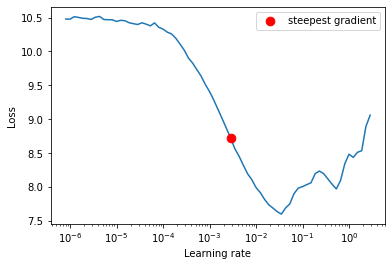

In [24]:
from torch_lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(network.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(network, optimizer, criterion, device=dev)
lr_finder.range_test(train_dl, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [18]:
network = torch.load('./resnet.pt')
network

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
imagesTs

array([[[[ 2.05920105e+02,  2.06514648e+02,  2.08313110e+02, ...,
           6.22895508e+02,  6.25027649e+02,  6.25684509e+02],
         [ 1.96092636e+02,  1.96668991e+02,  1.98416092e+02, ...,
           5.91203979e+02,  5.93159302e+02,  5.93761597e+02],
         [ 1.60518539e+02,  1.61043564e+02,  1.62651932e+02, ...,
           4.76207764e+02,  4.77539337e+02,  4.77949493e+02],
         ...,
         [-1.57486572e+01,  1.84840088e+01,  1.44085098e+02, ...,
           5.87815674e+02,  5.70574219e+02,  5.65534912e+02],
         [-2.38638077e+01,  1.08863859e+01,  1.38234238e+02, ...,
           5.88121887e+02,  5.70661133e+02,  5.65578064e+02],
         [-2.60849724e+01,  8.81057167e+00,  1.36660675e+02, ...,
           5.88190796e+02,  5.70648132e+02,  5.65546875e+02]],

        [[ 2.24038849e+02,  2.24646652e+02,  2.26485260e+02, ...,
           6.19192505e+02,  6.21251526e+02,  6.21923096e+02],
         [ 2.13991989e+02,  2.14581207e+02,  2.16367340e+02, ...,
           5.86793579e

In [21]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

val_acc = 0
counter = 0
with torch.no_grad():
    for xb, yb in valid_dl:
        xb, yb = xb.to(device), yb.to(device)
        out = network(xb)
        val_acc += accuracy(out, yb)
        counter += 1
print(val_acc/counter)

tensor(0.6322, device='cuda:0')


In [24]:
classIDDict

{'n02699494': 0,
 'n07920052': 1,
 'n02190166': 2,
 'n02892201': 3,
 'n04376876': 4,
 'n03770439': 5,
 'n01984695': 6,
 'n04149813': 7,
 'n03983396': 8,
 'n02056570': 9,
 'n03891332': 10,
 'n02480495': 11,
 'n03637318': 12,
 'n03662601': 13,
 'n04532106': 14,
 'n02123394': 15,
 'n01644900': 16,
 'n02281406': 17,
 'n09246464': 18,
 'n03544143': 19,
 'n03179701': 20,
 'n02666196': 21,
 'n03837869': 22,
 'n02504458': 23,
 'n02906734': 24,
 'n04179913': 25,
 'n03388043': 26,
 'n02094433': 27,
 'n03355925': 28,
 'n02837789': 29,
 'n02226429': 30,
 'n02125311': 31,
 'n02843684': 32,
 'n02823428': 33,
 'n04285008': 34,
 'n03400231': 35,
 'n04371430': 36,
 'n02999410': 37,
 'n03444034': 38,
 'n03814639': 39,
 'n02231487': 40,
 'n02415577': 41,
 'n02815834': 42,
 'n03424325': 43,
 'n02791270': 44,
 'n02950826': 45,
 'n02236044': 46,
 'n02793495': 47,
 'n02364673': 48,
 'n03670208': 49,
 'n01641577': 50,
 'n01742172': 51,
 'n09193705': 52,
 'n03393912': 53,
 'n07579787': 54,
 'n03977966': 55,
 '